In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "run40-TRB-HUMAN-shared-clones.xlsx"
ptfile = "20201116-RUN40-DataSheet.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,...,Chain,Patient,SampleInfo,UMI,Group,HEK cells,RACE,Constant,ChainOrig,Sample
0,N711_S502,A11-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S9,...,BCRh,A1,Spleen-day21,no,VERA,yes,no,no,mBCRh,A11-Bh_S9
1,N712_S502,A12-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S10,...,BCRh,A2,Spleen-day21,no,VERA,yes,no,no,mBCRh,A12-Bh_S10
2,N714_S502,A13-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S11,...,BCRh,A3,Spleen-day21,no,VERA,yes,no,no,mBCRh,A13-Bh_S11
3,N715_S502,A14-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S12,...,BCRh,A4,Spleen-day21,no,VERA,yes,no,no,mBCRh,A14-Bh_S12
4,N716_S502,A15-Bh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S13,...,BCRh,A5,Spleen-day21,no,VERA,yes,no,no,mBCRh,A15-Bh_S13


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones") and "TRB_HUMAN" in x]
myfiles.sort()
myfiles = myfiles[-4:]
myfiles

['cdr3-clones-BMC-TRB_HUMAN-after-reassignment.csv',
 'cdr3-clones-DOMINO-TRB_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,BMC110-1-TuH_S1,CSVTDGPNQPQHFG,1135
1,BMC110-1-TuH_S1,CSVQQGVRDEQYFG,995
2,BMC110-1-TuH_S1,CSAGGDRGLHEQYFG,863
3,BMC110-1-TuH_S1,CASSYSETGGEDYGYTFG,293
4,BMC110-1-TuH_S1,CASSYGTSGKYEQFFG,268


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
88635,DO-041V0-Tu_S238,CVSSLGGGPAGIQYFG,1
88636,DO-041V0-Tu_S238,CVSSPQGAGGEQFFG,1
88637,DO-041V0-Tu_S238,CVSSPQQGMNTEAFFG,1
88638,DO-041V0-Tu_S238,CVSSRGAGTDTQYFG,1
88639,DO-041V0-Tu_S238,CYTDRDTEAFFG,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,...,Species,Chain,Patient,SampleInfo,UMI,Group,HEK cells,RACE,Constant,ChainOrig
0,BMC110-1-TuH_S1,CSVTDGPNQPQHFG,1135,N701_S502,BMC110-1-TuH,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,BMC110,V1,yes,NaN,yes,no,no,TCRb
1,BMC110-1-TuH_S1,CSVQQGVRDEQYFG,995,N701_S502,BMC110-1-TuH,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,BMC110,V1,yes,NaN,yes,no,no,TCRb
2,BMC110-1-TuH_S1,CSAGGDRGLHEQYFG,863,N701_S502,BMC110-1-TuH,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,BMC110,V1,yes,NaN,yes,no,no,TCRb
3,BMC110-1-TuH_S1,CASSYSETGGEDYGYTFG,293,N701_S502,BMC110-1-TuH,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,BMC110,V1,yes,NaN,yes,no,no,TCRb
4,BMC110-1-TuH_S1,CASSYGTSGKYEQFFG,268,N701_S502,BMC110-1-TuH,NaN,NaN,NaN,NaN,NaN,...,human,TCRb,BMC110,V1,yes,NaN,yes,no,no,TCRb


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,BMC110,BMC110-1-TuH_S1,CAAAGGSSYNEQFFG,1
1,BMC110,BMC110-1-TuH_S1,CAAAQGDSDTQYFG,1
2,BMC110,BMC110-1-TuH_S1,CAAERGDRTDTQYFG,1
3,BMC110,BMC110-1-TuH_S1,CAAGAGGDEQFFG,1
4,BMC110,BMC110-1-TuH_S1,CAAGEGGRQPQHFG,2


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,BMC110-1-TuH_S1,32926
1,BMC110-2-TuH_S2,14202
2,BMC111-1-TuH_S3,30954
3,BMC111-2-TuH_S4,17279
4,BMC116-1-TuH_S5,22390


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,BMC110,BMC110-1-TuH_S1,CAAAGGSSYNEQFFG,1,32926
1,BMC110,BMC110-1-TuH_S1,CAAAQGDSDTQYFG,1,32926
2,BMC110,BMC110-1-TuH_S1,CAAERGDRTDTQYFG,1,32926
3,BMC110,BMC110-1-TuH_S1,CAAGAGGDEQFFG,1,32926
4,BMC110,BMC110-1-TuH_S1,CAAGEGGRQPQHFG,2,32926


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
1190204,DO-041V0,DO-041V0-Tu_S238,CVSSLGGGPAGIQYFG,1,25108
1190205,DO-041V0,DO-041V0-Tu_S238,CVSSPQGAGGEQFFG,1,25108
1190206,DO-041V0,DO-041V0-Tu_S238,CVSSPQQGMNTEAFFG,1,25108
1190207,DO-041V0,DO-041V0-Tu_S238,CVSSRGAGTDTQYFG,1,25108
1190208,DO-041V0,DO-041V0-Tu_S238,CYTDRDTEAFFG,1,25108


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,BMC110,BMC110-1-TuH_S1,CAAAGGSSYNEQFFG,1,32926,0.003037
1,BMC110,BMC110-1-TuH_S1,CAAAQGDSDTQYFG,1,32926,0.003037
2,BMC110,BMC110-1-TuH_S1,CAAERGDRTDTQYFG,1,32926,0.003037
3,BMC110,BMC110-1-TuH_S1,CAAGAGGDEQFFG,1,32926,0.003037
4,BMC110,BMC110-1-TuH_S1,CAAGEGGRQPQHFG,2,32926,0.006074


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['BMC110-1-TuH_S1',
 'BMC110-2-TuH_S2',
 'BMC111-1-TuH_S3',
 'BMC111-2-TuH_S4',
 'BMC116-1-TuH_S5',
 'BMC116-2-TuH_S6',
 'BMC132-1-TuH_S7',
 'BMC132-2-TuH_S8',
 'BMC140-1-TuH_S25',
 'BMC140-2-TuH_S26']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,BMC110-2-TuH_S2,BMC110-1-TuH_S1,38.093226,30.419729
1,BMC111-1-TuH_S3,BMC110-1-TuH_S1,2.477870,1.041730
2,BMC111-2-TuH_S4,BMC110-1-TuH_S1,2.395972,2.062200
3,BMC116-1-TuH_S5,BMC110-1-TuH_S1,1.594462,1.132843
4,BMC116-2-TuH_S6,BMC110-1-TuH_S1,1.605868,1.017433


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,BMC110-2-TuH_S2,BMC110-1-TuH_S1,38.093226,30.419729,BMC110,BMC110
1,BMC111-1-TuH_S3,BMC110-1-TuH_S1,2.477870,1.041730,BMC111,BMC110
2,BMC111-2-TuH_S4,BMC110-1-TuH_S1,2.395972,2.062200,BMC111,BMC110
3,BMC116-1-TuH_S5,BMC110-1-TuH_S1,1.594462,1.132843,BMC116,BMC110
4,BMC116-2-TuH_S6,BMC110-1-TuH_S1,1.605868,1.017433,BMC116,BMC110


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,1543,BMC234-2-TuH_S122,BMC234-1-TuH_S121,73.699622,59.994436,BMC234,BMC234
1,3288,BMC207-1-TuH_S74,BMC207-2-TuH_S75,48.273548,47.624876,BMC207,BMC207
2,2995,BMC235-1-TuH_S123,BMC235-2-TuH_S124,50.035029,47.113481,BMC235,BMC235
3,3550,BMC132-2-TuH_S8,BMC132-1-TuH_S7,52.201330,46.761188,BMC132,BMC132
4,3659,BMC230-2-TuH_S100,BMC230-1-TuH_S99,46.775393,45.982587,BMC230,BMC230


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,1543,BMC234-2-TuH_S122,BMC234-1-TuH_S121,73.699622,59.994436,BMC234,BMC234,same
1,3288,BMC207-1-TuH_S74,BMC207-2-TuH_S75,48.273548,47.624876,BMC207,BMC207,same
2,2995,BMC235-1-TuH_S123,BMC235-2-TuH_S124,50.035029,47.113481,BMC235,BMC235,same
3,3550,BMC132-2-TuH_S8,BMC132-1-TuH_S7,52.201330,46.761188,BMC132,BMC132,same
4,3659,BMC230-2-TuH_S100,BMC230-1-TuH_S99,46.775393,45.982587,BMC230,BMC230,same


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run40-TRB-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,1543,BMC234-2-TuH_S122,BMC234-1-TuH_S121,73.699622,59.994436,BMC234,BMC234,same
1,1,3288,BMC207-1-TuH_S74,BMC207-2-TuH_S75,48.273548,47.624876,BMC207,BMC207,same
2,2,2995,BMC235-1-TuH_S123,BMC235-2-TuH_S124,50.035029,47.113481,BMC235,BMC235,same
3,3,3550,BMC132-2-TuH_S8,BMC132-1-TuH_S7,52.201330,46.761188,BMC132,BMC132,same
4,4,3659,BMC230-2-TuH_S100,BMC230-1-TuH_S99,46.775393,45.982587,BMC230,BMC230,same


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,1543,BMC234-2-TuH_S122,BMC234-1-TuH_S121,73.699622,59.994436,BMC234,BMC234,same,BMC234-2-TuH_S122->BMC234-1-TuH_S121,purple
1,1,3288,BMC207-1-TuH_S74,BMC207-2-TuH_S75,48.273548,47.624876,BMC207,BMC207,same,BMC207-1-TuH_S74->BMC207-2-TuH_S75,purple
2,2,2995,BMC235-1-TuH_S123,BMC235-2-TuH_S124,50.035029,47.113481,BMC235,BMC235,same,BMC235-1-TuH_S123->BMC235-2-TuH_S124,purple
3,3,3550,BMC132-2-TuH_S8,BMC132-1-TuH_S7,52.201330,46.761188,BMC132,BMC132,same,BMC132-2-TuH_S8->BMC132-1-TuH_S7,purple
4,4,3659,BMC230-2-TuH_S100,BMC230-1-TuH_S99,46.775393,45.982587,BMC230,BMC230,same,BMC230-2-TuH_S100->BMC230-1-TuH_S99,purple


Wrote run40-TRB-HUMAN-shared-clones-all.pdf to disk


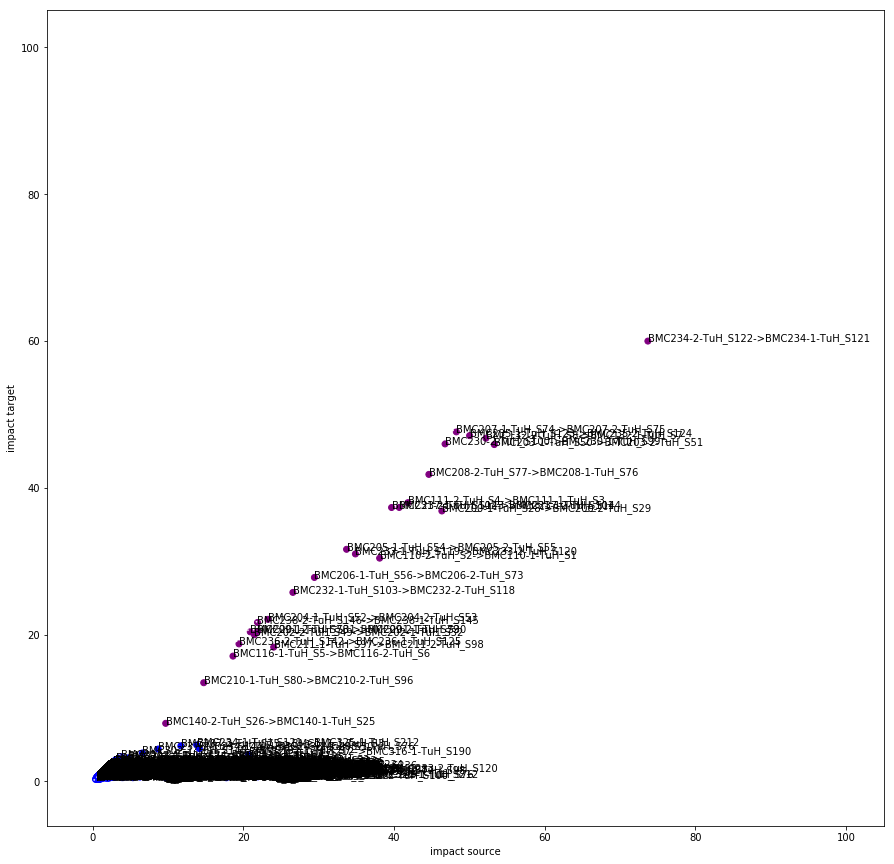

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,26,BMC234-1-TuH_S121,BMC325-1-TuH_S212,13.808133,4.965835,different,BMC234-1-TuH_S121->BMC325-1-TuH_S212,blue
1,27,BMC207-2-TuH_S75,BMC111-1-TuH_S3,11.710505,4.845900,different,BMC207-2-TuH_S75->BMC111-1-TuH_S3,blue
2,28,BMC234-1-TuH_S121,BMC208-1-TuH_S76,14.155886,4.467759,different,BMC234-1-TuH_S121->BMC208-1-TuH_S76,blue
3,29,BMC237-2-TuH_S144,BMC203-1-TuH_S50,8.697388,4.407594,different,BMC237-2-TuH_S144->BMC203-1-TuH_S50,blue
4,30,BMC302-1-TuH_S148,BMC132-1-TuH_S7,6.598341,3.870448,different,BMC302-1-TuH_S148->BMC132-1-TuH_S7,blue


Wrote run40-TRB-HUMAN-shared-clones-different-ids.pdf to disk


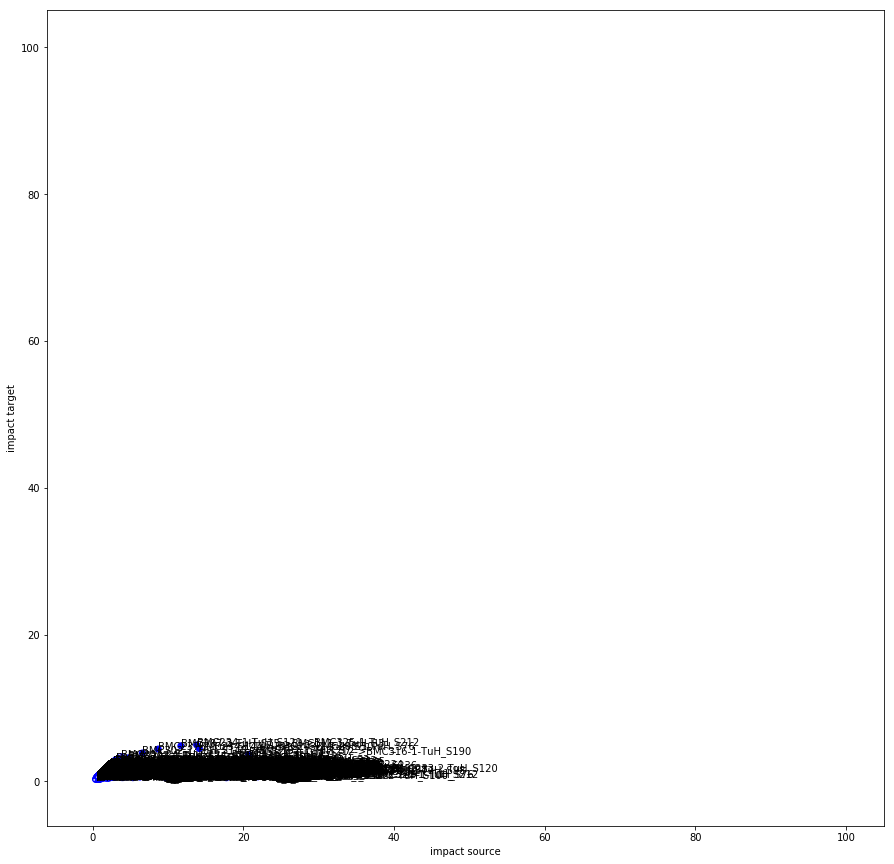

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [26]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,BMC110,BMC110-1-TuH_S1,CAAAGGSSYNEQFFG,1,32926,0.003037
1,BMC110,BMC110-1-TuH_S1,CAAAQGDSDTQYFG,1,32926,0.003037
2,BMC110,BMC110-1-TuH_S1,CAAERGDRTDTQYFG,1,32926,0.003037
3,BMC110,BMC110-1-TuH_S1,CAAGAGGDEQFFG,1,32926,0.003037
4,BMC110,BMC110-1-TuH_S1,CAAGEGGRQPQHFG,2,32926,0.006074


In [27]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [28]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient            Sample                   
                 nunique     names nunique              names
cdr3pep                                                      
CAAAAETGPNEQFFG        1    BMC303       1  BMC303-1-TuH_S149
CAAAAGDTGELFFG         1    BMC207       1   BMC207-2-TuH_S75
CAAAAGFSYEQYFG         1    BMC111       1    BMC111-2-TuH_S4
CAAAAGLGAYNEQFFG       1  DO-021V0       1   DO-021V0-Tu_S234
CAAAALNQPQHFG          1    BMC315       1  BMC315-1-TuH_S189

In [29]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient           cdr3pep          BMC110                          BMC111  \
Sample                    BMC110-1-TuH_S1 BMC110-2-TuH_S2 BMC111-1-TuH_S3   
0         CAAAAETGPNEQFFG             NaN             NaN             NaN   
1          CAAAAGDTGELFFG             NaN             NaN             NaN   
2          CAAAAGFSYEQYFG             NaN             NaN             NaN   
3        CAAAAGLGAYNEQFFG             NaN             NaN             NaN   
4           CAAAALNQPQHFG             NaN             NaN             NaN   

Patient                          BMC116                          BMC132  \
Sample  BMC111-2-TuH_S4 BMC116-1-TuH_S5 BMC116-2-TuH_S6 BMC132-1-TuH_S7   
0                   NaN             NaN             NaN             NaN   
1                   NaN             NaN             NaN             NaN   
2              0.005787             NaN             NaN             NaN   
3                   NaN             NaN             NaN             NaN   
4                   NaN             NaN             NaN             NaN   

Patient                           BMC140       ...                   BMC326  \
Sample  BMC132-2-TuH_S8 BMC140-1-TuH_S25       ...        BMC326-1-TuH_S213   
0                   NaN              NaN       ...                      NaN   
1                   NaN              NaN       ...                      NaN   
2                   NaN              NaN       ...                      NaN   
3                   NaN              NaN       ...                      NaN   
4                   NaN              NaN       ...                      NaN   

Patient            BMC327            BMC328            BMC329  \
Sample  BMC327-1-TuH_S214 BMC328-1-TuH_S215 BMC329-1-TuH_S232   
0                     NaN               NaN               NaN   
1                     NaN               NaN               NaN   
2                     NaN               NaN               NaN   
3                     NaN               NaN               NaN   
4                     NaN               NaN               NaN   

Patient         DO-017V0         DO-021V0         DO-023V0         DO-029V0  \
Sample  DO-017V0-Tu_S233 DO-021V0-Tu_S234 DO-023V0-Tu_S235 DO-029V0-Tu_S236   
0                    NaN              NaN              NaN              NaN   
1                    NaN              NaN              NaN              NaN   
2                    NaN              NaN              NaN              NaN   
3                    NaN         0.002906              NaN              NaN   
4                    NaN              NaN              NaN              NaN   

Patient         DO-036V0         DO-041V0  
Sample  DO-036V0-Tu_S237 DO-041V0-Tu_S238  
0                    NaN              NaN  
1                    NaN              NaN  
2                    NaN              NaN  
3                    NaN              NaN  
4                    NaN              NaN  

[5 rows x 88 columns]

In [30]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/data/home/bioinfo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


index         cdr3pep Patient  \
                          nunique   
0  196692          CASSFG      61   
1  303606         CASSLFG      55   
2  420192         CASSPFG      47   
3  486759   CASSPSTDTQYFG      44   
4  312022  CASSLGGNTEAFFG      41   

                                                      Sample  \
                                               names nunique   
0  BMC308, BMC319, BMC326, BMC238, BMC202, BMC132...      87   
1  BMC319, BMC326, BMC238, BMC202, BMC132, BMC312...      76   
2  BMC308, BMC319, BMC238, BMC202, BMC132, BMC316...      59   
3  BMC308, BMC238, BMC202, BMC132, BMC312, BMC302...      52   
4  BMC319, BMC238, BMC202, BMC132, BMC316, DO-021...      47   

                                                              BMC110  \
                                               names BMC110-1-TuH_S1   
0  DO-041V0-Tu_S238, BMC116-2-TuH_S6, BMC308-1-Tu...        0.173115   
1  BMC203-1-TuH_S50, BMC323-1-TuH_S210, BMC231-2-...        0.045557   
2  BMC323-1-TuH_S210, BMC329-1-TuH_S232, DO-029V0...        0.006074   
3  BMC323-1-TuH_S210, BMC231-2-TuH_S102, BMC329-1...             NaN   
4  BMC323-1-TuH_S210, BMC231-2-TuH_S102, BMC207-1...        0.006074   

                           BMC111                       ...         \
  BMC110-2-TuH_S2 BMC111-1-TuH_S3 BMC111-2-TuH_S4       ...          
0        0.126743        0.193836        0.133110       ...          
1        0.049289        0.025845        0.005787       ...          
2        0.007041        0.006461        0.005787       ...          
3             NaN             NaN        0.005787       ...          
4        0.021124        0.025845             NaN       ...          

             BMC326            BMC327            BMC328            BMC329  \
  BMC326-1-TuH_S213 BMC327-1-TuH_S214 BMC328-1-TuH_S215 BMC329-1-TuH_S232   
0          0.110918          0.182998          0.097664          0.141904   
1          0.043403          0.020717          0.004069          0.018921   
2               NaN          0.024170          0.012208          0.004730   
3               NaN          0.003453               NaN          0.009460   
4               NaN               NaN               NaN               NaN   

          DO-017V0         DO-021V0         DO-023V0         DO-029V0  \
  DO-017V0-Tu_S233 DO-021V0-Tu_S234 DO-023V0-Tu_S235 DO-029V0-Tu_S236   
0         0.296161         0.232504         0.145403         0.178610   
1         0.017086         0.578354         0.014071         0.021556   
2              NaN         0.008719         0.009381         0.012318   
3              NaN         0.017438              NaN         0.006159   
4              NaN         0.005813         0.037523         0.040033   

          DO-036V0         DO-041V0  
  DO-036V0-Tu_S237 DO-041V0-Tu_S238  
0         0.270438         0.286761  
1         0.029325         0.015931  
2              NaN         0.007966  
3              NaN         0.015931  
4         0.009775         0.015931  

[5 rows x 93 columns]

In [31]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 1010015
cdr3's in > 1 sample: 100221


In [32]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote run40-TRB-HUMAN-shared-clones-occurrence.xlsx to disk
